# Introduction to Neural Networks


In [1]:
!git clone https://github.com/icomse/8th_workshop_MachineLearning.git
import os
os.chdir('8th_workshop_MachineLearning/data')

Cloning into '8th_workshop_MachineLearning'...
remote: Enumerating objects: 200, done.
remote: Counting objects: 100% (200/200), done.
remote: Compressing objects: 100% (166/166), done.
remote: Total 200 (delta 90), reused 52 (delta 21), pack-reused 0
Receiving objects: 100% (200/200), 21.09 MiB | 12.27 MiB/s, done.
Resolving deltas: 100% (90/90), done.


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.optimize as op
import scipy.io as sio

## Logistic Regression

In [3]:
##Read in data
data = pd.read_csv('Exam_Data.txt')
data.head()
X = data.iloc[:,0:2]
Y = data.iloc[:, 2]

print(X.head())
Y.head()

X_new = X.copy()
X_new.insert(0,'x0', np.ones(len(X_new.index)))
print(X_new.head())

   Exam_1_Score  Exam_2_Score
0     34.623660     78.024693
1     30.286711     43.894998
2     35.847409     72.902198
3     60.182599     86.308552
4     79.032736     75.344376
    x0  Exam_1_Score  Exam_2_Score
0  1.0     34.623660     78.024693
1  1.0     30.286711     43.894998
2  1.0     35.847409     72.902198
3  1.0     60.182599     86.308552
4  1.0     79.032736     75.344376


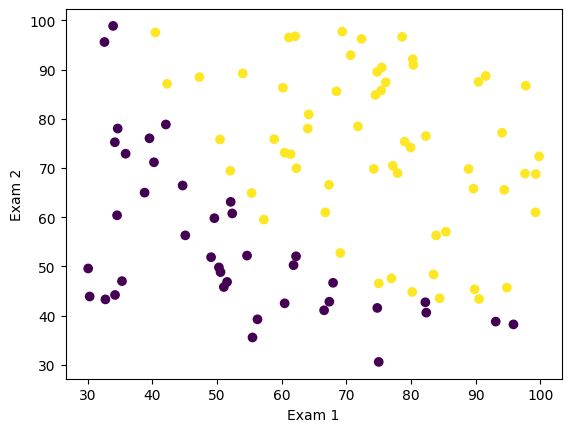

In [4]:
##Plot data. Colors indicate if a student passed a class or not.
plt.scatter(X_new.iloc[:,1],X_new.iloc[:,2],c = Y)#,Y)
plt.xlabel('Exam 1')
plt.ylabel('Exam 2')
plt.show()


We are going to use the sigmoid function for logistic regression. Code it up in the cell below.

In [5]:
###Define sigmoid function
def sigmoid(z):
  '''Function that takes an input z and returns the sigmoid transformation.
  If z is a vector or a matrix, it should perform the sigmoid transformation on every element.
  Input:
  z [=] scalar or array
  Return:
  g [=] scalar or array
  '''

  ###BEGIN SOLUTION
  g = 1/(1+np.exp(-z))

  return g

  ###END SOLUTION



In [6]:
##Test your function with different values and arrays.

test1 = 100000
test2 = -100000
test3 = np.array([test1, test2, 0])

print(sigmoid(test1), sigmoid(test2), sigmoid(test3))

1.0 0.0 [1.  0.  0.5]


<ipython-input-5-cdc91cf7ee56>:12: RuntimeWarning: overflow encountered in exp
  g = 1/(1+np.exp(-z))


Code the cost function for logistic regression below.

In [7]:
def cost(theta,X,y):
  ''' Function to calculate cost function assuming a hypothesis of form h = 1/(1+exp(theta.T*X))
  Inputs:
  X = feature matrix (Up to developer whether or not it includes columns of 1, but recommend it does)
  y = array of training examples
  theta = array of parameters for hypothesis

  Returns:
  J = cost function
  '''
  ###BEGIN SOLUTION
  m = len(y) #number of training examples
  #print(np.shape(X), np.shape(theta),len(X),len(theta))
  #X.insert(0, 'x0', np.ones(len(X.index)))
  #print(X)
  #X_new = X.copy()
  #X_new.insert(0,'x0', np.ones(len(X_new.index)))
  #feat_matrix = np.ones((m,len(theta)))
  #feat_matrix[:,1] = X

  z= np.dot(X,theta)
  h = sigmoid(z)#Hypothesis

  J = (1/m)*(-y@np.log(h) - (1-y)@np.log(1-h)) #Cost function
  ###END SOLUTION
  return J

In [8]:
##Test cost function. If done properly, you should get a value close to 0.693

initial_theta = np.zeros(len(X.columns)+1)
print(initial_theta)
###BEGIN SOLUTION
J = cost(initial_theta, X_new,Y)

print(J)
###END SOLUTION

[0. 0. 0.]
0.6931471805599453


Using advanced optimization algorithms require we provide them with a function that reports the gradient of the function we want to optimize. Write a function that returns the gradient of the cost function.

In [9]:
##Optimization algorithm
#Define gradient of cost function

###BEGIN SOLUTION
def Gradient(theta, X,y):
  '''Gradient of cost function
    Inputs:
  X = features
  y = training data
  theta = parameters
  Output:
  grad = gradient of cost function
  '''

  m = len(y) #number of training examples
  #print(np.shape(X), np.shape(theta),len(X),len(theta))
  #X.insert(0, 'x0', np.ones(len(X.index)))
  #print(X)

  #feat_matrix = np.ones((m,len(theta)))
  #feat_matrix[:,1] = X
  z= np.dot(X,theta)
  h = sigmoid(z)#Hypothesis

  grad = np.dot((h-y),X).transpose()/m #Grad of Cost function
  return grad
###END SOLUTION

In [10]:
## Test your grad function You should expect: [ -0.1        -12.00921659 -11.26284221]
G = Gradient(initial_theta, X_new,Y)
print(G)

[ -0.1        -12.00921659 -11.26284221]


In [11]:
#Now use the following command to perform the optimization. Expect values [-25.16131878   0.20623159   0.20147149]

Result = op.minimize(fun = cost, x0=initial_theta, args = (X_new,Y), method='TNC', jac = Gradient)

optimal_theta = Result.x
print(optimal_theta)

[-25.16131846   0.20623159   0.20147148]


Now that we have the optimal thetas for our logistic regression, replot the data along with the decision boundary.

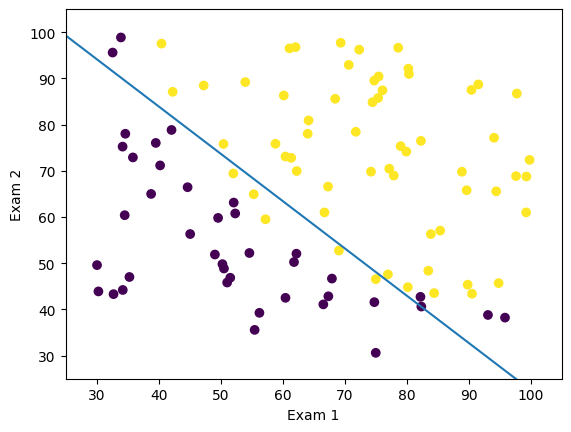

In [12]:
##Replot data with decision boundary
###BEGIN SOLUTION

x1_boundary = np.linspace(0,100,50)

decision = -(optimal_theta[1]*x1_boundary + optimal_theta[0])/optimal_theta[2]

plt.scatter(X_new.iloc[:,1],X_new.iloc[:,2],c = Y)#,Y)
plt.plot(x1_boundary,decision)
plt.xlabel('Exam 1')
plt.ylabel('Exam 2')
plt.ylim(25,105)
plt.xlim(25,105)
plt.show()

###END SOLUTION

How accurate is your model?

In [13]:
##What is the accuracy of the model?

###BEGIN SOLUTION
def predict(theta, X):
    '''Predict whether the label
    is 0 or 1 using learned logistic
    regression parameters '''
    m = len(X)
    p = np.zeros(m)

    h = sigmoid(X@theta.T)

    for it in range(len(h)):
        if h[it] >= 0.5:
            p[it] = 1
        else:
            p[it] = 0

    return p

#Compute accuracy on our training set
p = predict(optimal_theta, X_new)
percentage = len(Y.iloc[np.where(p==Y)])/len(Y)
print(percentage)

###END SOLUTION

0.89


Load data from the mnist database.

In [14]:
#Load in data which comes in as a MATLAB matrix
mat_contents = sio.loadmat("MNIST.mat")

The matrix is read in as a dictionary, so we can split it up into variables using the appropriate keys. Each row of $X$ consists of the flattened 20x20 pixel grid of a grayscale image corresponding to a number. Each row of $y$ consists of the number that is represented by the pixels in a row of $X$.

See below that we changed all values in $y$ that are $10$ to $0$; this is to account for some Matlab adjustments. This way when $i = 0, 1, 2, 3, ..., 9$ it matches the digit that is being predicted.

We also set up a feature matrix.

In [15]:
#Assign values to matrices
X = mat_contents['X']
y = mat_contents['y'].flatten()

#Change y values that are 10 to 0.

for i in range(len(y)):
  if y[i] == 10:
    y[i] = 0

#Shape of X. Which one is rows and which one is columns?
m,n = np.shape(X)

#Vector of ones to add to feature matrix. What are our features in this case?
ones = np.ones(m)

#X_new is our feature matrix with the added column of ones.
X_new = np.vstack((ones,X.T)).T


Before we get to a neural network, it is helpful to build intuition using logistic regression to do our classification. To do so, we need our sigmoid function and cost function.

In [16]:
##Vectorized version of logistic regression with regularization
###Define sigmoid function
def sigmoid(z):
  '''Function that takes an input z and returns the sigmoid transformation.
  If z is a vector or a matrix, it should perform the sigmoid transformation on every element.
  Input:
  z [=] scalar or array
  Return:
  g [=] scalar or array
  '''

  #
  g = 1/(1+np.exp(-z))

  return g


def cost(theta,X,y,l):
  ''' Function to calculate cost function assuming a hypothesis of form h = 1/(1+exp(theta.T*X))
  Inputs:
  X = feature matrix (Up to developer whether or not it includes columns of 1, but recommend it does)
  y = array of training examples
  theta = array of parameters for hypothesis
  l = regularization parameter

  Returns:
  J = regularized cost function
  '''

  m = len(y) #

  z= np.dot(X,theta) #
  h = sigmoid(z)#
  b = theta[1:]#

  J = (1/m)*(-y@np.log(h) - (1-y)@np.log(1-h)) + l/(2*m)*b@b#
  return J

With our cost function now defined, we need to define the gradient of the cost function to use the advanced optimization algorithms. Complete the function below. Do not forget this is for the regularized version.

In [17]:
def Gradient(theta, X,y, l):
  '''Gradient of cost function
    Inputs:
  X = features
  y = training data
  theta = parameters
  l = regularization parameter
  Output:
  grad = gradient of cost function
  '''
###BEGIN SOLUTION
  grad = np.zeros(np.size(theta))
  m = len(y)
  b = theta[1:]
  z= np.dot(X,theta)
  h = sigmoid(z)#Hypothesis
  #print(np.shape(X[0]), np.shape((h-y)), np.shape(X))
  grad[0] = np.dot((h-y),X[:,0]).transpose()/m #Grad of Cost function
  grad[1:] = np.dot((h-y),X[:,1:]).transpose()/m + l/m*b.transpose()
  return grad
###END SOLUTION

Test your implementation with the cell below.

In [18]:
##Test the various functions

X_t = np.array(([1.0000,0.1000,0.6000,1.1000],
   [1.0000,   0.2000,   0.7000,   1.2000],
   [1.0000,   0.3000,   0.8000,   1.3000],
   [1.0000,   0.4000,   0.9000,   1.4000],
   [1.0000,   0.5000,   1.0000,   1.5000]))

#print(X_t, X_t[0])

y_t = np.array(([1, 0, 1, 0, 1]))
#print(y_t)

theta_t = np.array(([-2,-1,1,2]))
print(cost(theta_t,X_t,y_t, 3))
print(Gradient(theta_t,X_t,y_t,3))

##If cost is correctly implemented, expect a value of 2.534819
##If gradient is correctly implemented, expect values of [ 0.14656137 -0.54855841  0.72472227  1.39800296]

2.534819396109744
[ 0.14656137 -0.54855841  0.72472227  1.39800296]


With the gradient set up, we can now perform a "one vs. all" classification algorithm to identify the numbers. Think carefully about the algorithm and read through the function below. What is it doing? Make sure to understand what each line is doing and add the appropriate comments.

In [19]:
#One vs. all classification

#With all your pieces in place, a one vs. all algorithm can be used to classify the different digits.
#The function below gets us part of the way there.

def onevsall(X,y,num_labels,l):
  '''
  Function that will train multiple logistic regression classifiers and returns
  the optimal thetas associated with the labels

  X = feature matrix
  y = labeled data
  num_labels = number of labels to be classified
  l = regularization parameter
  '''
  m,n = np.shape(X)
  all_theta = np.zeros((num_labels,n))

  for i in range(num_labels):
    initial_theta = np.zeros(n)
    y_binary = np.zeros(m)
    for j in range(m):
      if y[j] ==i:
        y_binary[j]=1
    Result = op.minimize(fun = cost, x0=initial_theta, args = (X,y_binary,l), method='TNC', jac = Gradient)
    optimal_theta = Result.x

    all_theta[i,:] = optimal_theta

  return all_theta

With the function set up, we can use it and obtain some thetas. What are they and what do they represent for each label? What is the structure of theta?

In [20]:
l_reg = 0.1

theta = onevsall(X_new,y,10,l_reg)

Now with the optimal thetas, write code below to find the accuracy of the algorithm.

In [21]:
##Prediction

###BEGIN SOLUTION
def predict(theta, X):
    '''Predict whether the label
    is 0 or 1 using learned logistic
    regression parameters '''
    m = len(X)
    p = np.zeros(m)

    h = sigmoid(X@theta.T)
    print(h[0], h[-1])
    for i in range(m):
      p[i] = np.argmax(h[i])
      #print(np.argmax(h[i]))
    #for it in range(len(h)):
    #    if h[it] > 0.5:
    #        p[it] = 1
    #    else:
    #        p[it] = 0

    return p

#Compute accuracy on our training set
p = predict(theta,X_new)
print(p)
print(p[0], p[-1], y[0],y[-1])
#p = p+1

#for i in range(len(p)):
#  if p[i] == 10:
#    p[i] = 0

#print(p[0], p[-1], y[0],y[-1])
#p = predict(optimal_theta, X_new)
#percentage = len(Y.iloc[np.where(p==Y)])/len(Y)
#print(percentage)
percentage = len(y[np.where(p==y)])/len(y)
print(percentage)
###END SOLUTION

[9.99725879e-01 6.49870849e-17 8.02486232e-05 5.59357108e-06
 1.63627455e-10 1.58258212e-04 2.43281419e-07 3.57323127e-09
 1.09234978e-05 1.58380567e-03] [4.43423722e-03 7.27335528e-19 1.99203809e-07 1.87231074e-10
 7.75005108e-06 8.96244773e-12 2.24632985e-09 2.41936740e-01
 8.61891725e-03 2.10645630e-01]
[0. 0. 0. ... 9. 9. 7.]
0.0 7.0 0 9
0.9646


## Neural Networks

We have taken optimized thetas for a neural network and now need to do a forward propagation to do the predictions. Theta1 is the set of weights linking the input layer to the hidden layer. Theta2 is the set of weights linking the hidden layer to the output.

In [22]:
###Forward propagation with pretrained thetas
weights = sio.loadmat("Weights.mat")
Theta1 = weights['Theta1']
Theta2 = weights['Theta2']

Perform the forward propagation, calculate the prediction on the data and assess the accuracy.

In [23]:
### Neural Network

###BEGIN SOLUTION
z_2 = X_new@Theta1.T
a_2 = sigmoid(z_2)

ones = np.ones(m)

a2_bias = np.vstack((ones,a_2.T)).T

z_3 = a2_bias@Theta2.T
h = sigmoid(z_3)

p = np.zeros(len(h))
print(h[-1])
for i in range(len(h)):
  p[i] = np.argmax(h[i])

print(p[0], p[-1], y[0],y[-1])
p = p+1

for i in range(len(p)):
  if p[i] == 10:
    p[i] = 0

print(p[0], p[-1], y[0],y[-1])

percentage = len(y[np.where(p==y)])/len(y)
print(percentage)

#print(len(h))
#for i in range(len(h)):
###indexing of loaded thetas were done with Matlab and they start at one, which then necessitates some fixing for the indexing.
###END SOLUTION

###BEGIN SOLUTION
X = mat_contents['X']
y = mat_contents['y'].flatten()

m,n = np.shape(X)
#print(m,n)

ones = np.ones(m)

X_new = np.vstack((ones,X.T)).T

z_2 = X_new@Theta1.T
a_2 = sigmoid(z_2)

ones = np.ones(m)

a2_bias = np.vstack((ones,a_2.T)).T

z_3 = a2_bias@Theta2.T
h = sigmoid(z_3)

p = np.zeros(len(h))
print(h[-1])
for i in range(len(h)):
  p[i] = np.argmax(h[i])

#print(p[0], p[-1], y[0],y[-1])
p = p+1 ##adjust indexing

#for i in range(len(p)):
#  if p[i] == 10:
#    p[i] = 0

#print(p[0], p[-1], y[0],y[-1])

percentage = len(y[np.where(p==y)])/len(y)
print(percentage)
###END SOLUTION

[4.81465717e-05 4.58821829e-04 2.15146201e-05 3.31719561e-03
 1.55814354e-04 3.02724040e-03 3.69700393e-02 5.73434571e-03
 6.96288990e-01 8.18576980e-02]
9.0 8.0 0 9
0.0 9.0 0 9
0.9752
[4.81465717e-05 4.58821829e-04 2.15146201e-05 3.31719561e-03
 1.55814354e-04 3.02724040e-03 3.69700393e-02 5.73434571e-03
 6.96288990e-01 8.18576980e-02]
0.9752


## Backpropagation

Play close attention to the data structure.

In [24]:
print(np.shape(Theta1))
m_t1, n_t1 = np.shape(Theta1)
print(np.shape(Theta2))
m_t2, n_t2 = np.shape(Theta2)

##Combining Thetas into a single array
Thetas = np.hstack([Theta1.flatten(), Theta2.flatten()])
print(Thetas, len(Thetas))

##Example of reshaping
Theta_reshaped_1 = Thetas[:m_t1*n_t1].reshape(m_t1,n_t1)

print(Theta_reshaped_1, np.shape(Theta_reshaped_1))

Theta_reshaped_2 = Thetas[m_t1*n_t1:].reshape(m_t2, n_t2)

print(np.shape(Theta_reshaped_2))

(25, 401)
(10, 26)
[-2.25623899e-02 -1.05624163e-08  2.19414684e-09 ... -2.47795788e-01
  1.28009118e+00 -1.32752042e+00] 10285
[[-2.25623899e-02 -1.05624163e-08  2.19414684e-09 ... -1.30529929e-05
  -5.04175101e-06  2.80464449e-09]
 [-9.83811294e-02  7.66168682e-09 -9.75873689e-09 ... -5.60134007e-05
   2.00940969e-07  3.54422854e-09]
 [ 1.16156052e-01 -8.77654466e-09  8.16037764e-09 ... -1.20951657e-04
  -2.33669661e-06 -7.50668099e-09]
 ...
 [-1.83220638e-01 -8.89272060e-09 -9.81968100e-09 ...  2.35311186e-05
  -3.25484493e-06  9.02499060e-09]
 [-7.02096331e-01  3.05178374e-10  2.56061008e-09 ... -8.61759744e-04
   9.43449909e-05  3.83761998e-09]
 [-3.50933229e-01  8.85876862e-09 -6.57515140e-10 ... -1.80365926e-06
  -8.14464807e-06  8.79454531e-09]] (25, 401)
(10, 26)


Write a function that returns the cost function of a non regularized neural network. Recall that the output of a neural network is going to be a vector with zeros and ones, with the one at the position that corresponds to the digit to be classified. In this case, for a given datum y = 1, we have already changed it to y = [1,0,0...,0]. Similarly, for a datum of y = 10, changed it to y = [0,0,0,...,0,1].

Also, think about how you want to take in the theta parameters. I recommend taking in a single array that contains all of the thetas and you rebuild it inside the function.

For this case we have 400 nodes in our input layer and 25 nodes in the hidden layer. There are ten nodes in the output layer.

In [25]:
###Transforming y data to vectors for NN
y_nn = y.copy()
y_nn -=1
y_matrix = np.eye(10)[y_nn[:]]
print(y_matrix, y_matrix[0], len(y_matrix), len(y_matrix[0]))

###BEGIN SOLUTION
def cost(theta,X,y,l,input_layer_size,hidden_layer_size,num_labels):
  ''' Function to calculate cost function assuming a hypothesis of form h = 1/(1+exp(theta.T*X))
  Inputs:
  X = feature matrix (Up to developer whether or not it includes columns of 1, but recommend it does)
  y = array of training examples
  theta = array of parameters for hypothesis
  l = regularization parameter

  Returns:
  J = cost function
  '''
  theta_reshaped_1 = theta[:(input_layer_size+1)*hidden_layer_size].reshape(hidden_layer_size,(input_layer_size+1))
  theta_reshaped_2 = theta[(input_layer_size+1)*hidden_layer_size:].reshape(num_labels,(hidden_layer_size+1))

  m = len(y) #number of training examples

  ##Forward Propagation
  z_2 = X@theta_reshaped_1.T#Theta1.T
  a_2 = sigmoid(z_2)

  ones = np.ones(m)

  a2_bias = np.vstack((ones,a_2.T)).T

  z_3 = a2_bias@theta_reshaped_2.T#Theta2.T
  h = sigmoid(z_3)


  #print(np.shape(theta), np.shape(X), np.shape(y),np.shape(h))
  J = (1/m)*(-np.trace(y.T@np.log(h)) - np.trace((1-y).T@np.log(1-h)))

  #J = (1/m)*(-y@np.log(h) - (1-y)@np.log(1-h)) + l/(2*m)*b@b#Vectorized Cost function

  return J


print(cost(Thetas,X_new,y_matrix,0,400,25,10))
###END SOLUTION


## If your function is correctly implemented, you should expect a cost value of 0.287629

[[0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 ...
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 1. 0.]] [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.] 5000 10
0.2876291651613189


Now do the cost function again, but with regularization.

In [26]:
def cost_reg(theta,X,y,l,input_layer_size,hidden_layer_size,num_labels):
  ''' Function to calculate cost function assuming a hypothesis of form h = 1/(1+exp(theta.T*X))
  Inputs:
  X = feature matrix (Up to developer whether or not it includes columns of 1, but recommend it does)
  y = array of training examples
  theta = array of parameters for hypothesis
  l = regularization parameter

  Returns:
  J = cost function
  '''
  theta_reshaped_1 = theta[:(input_layer_size+1)*hidden_layer_size].reshape(hidden_layer_size,(input_layer_size+1))
  theta_reshaped_2 = theta[(input_layer_size+1)*hidden_layer_size:].reshape(num_labels,(hidden_layer_size+1))

  m = len(y) #number of training examples

  ##Forward Propagation
  z_2 = X@theta_reshaped_1.T
  a_2 = sigmoid(z_2)

  ones = np.ones(m)

  a2_bias = np.vstack((ones,a_2.T)).T

  z_3 = a2_bias@theta_reshaped_2.T
  h = sigmoid(z_3)

  b = theta_reshaped_1[:,1:]
  c = theta_reshaped_2[:,1:]

  #print(np.shape(b), np.shape(c))
  #print(np.shape(theta), np.shape(X), np.shape(y),np.shape(h))
  J = (1/m)*(-np.trace(y.T@np.log(h)) - np.trace((1-y).T@np.log(1-h))) + l/(2*m)*(np.trace(b.T@b) + np.trace(c.T@c))

  #J = (1/m)*(-y@np.log(h) - (1-y)@np.log(1-h)) + l/(2*m)*b@b#Vectorized Cost function

  return J
print(cost_reg(Thetas,X_new,y_matrix,1,400,25,10))
###END SOLUTION

## If your function is correctly implemented, you should expect a cost value of 0.383770

0.38376985909092365


Need to calculate gradients for backpropagation

Set up function to calculate gradient of sigmoid. It should work with scalars or vectors.

In [27]:
###BEGIN SOLUTION
def sigmoidGradient(z):
  g =sigmoid(z)*(1-sigmoid(z))
  return g

###END SOLUTION

For proper calculation of the thetas, you need to iterate over every datum, do forward propagation, and then calculate the deltas. Then accumulate into the gradient of cost functions. You can add regularization after the for loop over data.

Set up a function that returns the flattened gradient for the thetas for a regularized cost function. Call it Gradient

In [28]:
##For proper calculation, you need to iterate over every datum, do forward propagation, and then calculate the deltas
##Then accumulate into the gradient of cost functions. You can add regularization after the for loop over data.

#Set up a function that returns the flattened gradient for the thetas. Call it Gradient
###BEGIN SOLUTION
def Gradient(theta,X,y,l,input_layer_size,hidden_layer_size,num_labels):

  ##As in cost function, take flattened thetas and reshape
  theta_reshaped_1 = theta[:(input_layer_size+1)*hidden_layer_size].reshape(hidden_layer_size,(input_layer_size+1))
  theta_reshaped_2 = theta[(input_layer_size+1)*hidden_layer_size:].reshape(num_labels,(hidden_layer_size+1))

  m = len(y) #number of training examples

  theta_1_grad = np.zeros(np.shape(theta_reshaped_1))
  theta_2_grad = np.zeros(np.shape(theta_reshaped_2))

  ##Thetas w/o the bias nodes
  theta_1_nobias = theta_reshaped_1[:,1:]
  theta_2_nobias = theta_reshaped_2[:,1:]

  for t in range(m): #Iterate over data
    ##Do fwd propagation
    #First layer
    z_2 = X[t,:]@theta_reshaped_1.T
    a_2 = sigmoid(z_2)

    #Second layer
    ones = np.ones(1)
    #Add bias
    a2_bias = np.insert(a_2,0,1) #a_2.insert(0,1)#np.vstack((ones,a_2.T)).T
    z_3 = a2_bias@theta_reshaped_2.T

    #Output
    h = sigmoid(z_3)

    ##Now calculated deltas in backward direction

    delta_3 = h-y[t,:]
    delta_2 = np.multiply((delta_3@theta_2_nobias), sigmoidGradient(z_2))
    #Accumulate deltas for gradient
    #print(np.shape(delta_3), np.shape(a2_bias),np.shape(theta_2_grad))
    theta_2_grad +=np.outer(delta_3,a2_bias)#delta_3.T*a2_bias
    theta_1_grad +=np.outer(delta_2,X[t,:])

  #Exit for loop
  #Divide by m for the gradients
  theta_1_grad = theta_1_grad/m
  theta_2_grad = theta_2_grad/m

  #Add regularization

  theta_1_grad[:,1:] = theta_1_grad[:,1:] + (l/m)*theta_1_nobias
  theta_2_grad[:,1:] = theta_2_grad[:,1:] + (l/m)*theta_2_nobias

  #Flatten gradient

  final_gradient = np.hstack([theta_1_grad.flatten(), theta_2_grad.flatten()])

  return final_gradient

final_gradient = Gradient(Thetas,X_new,y_matrix,1,400,25,10)
print(final_gradient, len(final_gradient))
###END SOLUTION

#If done correctly, expect an output of the gradient like this: [ 6.18712766e-05 -2.11248326e-12  4.38829369e-13 ...  4.70513145e-05
#-5.01718610e-04  5.07825789e-04]

[ 6.18712766e-05 -2.11248326e-12  4.38829369e-13 ...  4.70513145e-05
 -5.01718610e-04  5.07825789e-04] 10285


Now with our cost function and gradient function, we can use the advanced optimization algorithms to find the optimal thetas.

In [29]:
rand_theta_1 = np.random.rand(25,401)*2*0.12-0.12
rand_theta_2 = np.random.rand(10,26)*2*0.12-0.12

initial_theta = np.hstack([rand_theta_1.flatten(), rand_theta_2.flatten()])


Result = op.minimize(fun = cost_reg, x0=initial_theta, method='L-BFGS-B', jac = Gradient, args=(X_new,y_matrix,1,400,25,10),options={'maxiter':50})
optimal_theta = Result.x

print(optimal_theta)

[-0.30572013  0.02861484  0.03473559 ... -1.28003908 -1.61659436
 -2.10956479]


Calculate predictions based on your optimized thetas. If implemented correctly, expect accuracy close to 95%.

In [30]:
###BEGIN SOLUTION
input_layer_size = 400
hidden_layer_size = 25
num_labels = 10
opt_theta_reshaped_1 = optimal_theta[:(input_layer_size+1)*hidden_layer_size].reshape(hidden_layer_size,(input_layer_size+1))
opt_theta_reshaped_2 = optimal_theta[(input_layer_size+1)*hidden_layer_size:].reshape(num_labels,(hidden_layer_size+1))

##Forward prop
z_2 = X_new@opt_theta_reshaped_1.T
a_2 = sigmoid(z_2)

ones = np.ones(m)

a2_bias = np.vstack((ones,a_2.T)).T

z_3 = a2_bias@opt_theta_reshaped_2.T
h = sigmoid(z_3)

#print(h[0])

p = np.zeros(m)

for i in range(m):
  p[i] = np.argmax(h[i])

p = p+1
print(p, p[0], p[-1])

percentage = len(y[np.where(p==y)])/len(y)
print(percentage)
###END SOLUTION

[10. 10. 10. ...  9.  9.  9.] 10.0 9.0
0.966


## Using PyTorch

In [31]:
import torch
import torch.nn as nn
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from torch.utils.data import TensorDataset, DataLoader

## Code from https://github.com/rasbt/machine-learning-book/blob/main/ch12/ch12_part2.ipynb

In [32]:
iris = load_iris()
X = iris['data']
y = iris['target']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=1./3, random_state=1)

In [33]:
X_train_norm = (X_train - np.mean(X_train)) / np.std(X_train)
X_train_norm = torch.from_numpy(X_train_norm).float()
y_train = torch.from_numpy(y_train)

train_ds = TensorDataset(X_train_norm, y_train)

torch.manual_seed(1)
batch_size = 2
train_dl = DataLoader(train_ds, batch_size, shuffle=True)

In [34]:
class Model(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super().__init__()
        self.layer1 = nn.Linear(input_size, hidden_size)
        self.layer2 = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        x = self.layer1(x)
        x = nn.Sigmoid()(x)
        x = self.layer2(x)
        x = nn.Softmax(dim=1)(x)
        return x

input_size = X_train_norm.shape[1]
hidden_size = 16
output_size = 3

model = Model(input_size, hidden_size, output_size)

learning_rate = 0.001

loss_fn = nn.CrossEntropyLoss()

optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [35]:
num_epochs = 100
loss_hist = [0] * num_epochs
accuracy_hist = [0] * num_epochs

for epoch in range(num_epochs):

    for x_batch, y_batch in train_dl:
        pred = model(x_batch)
        loss = loss_fn(pred, y_batch.long())
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

        loss_hist[epoch] += loss.item()*y_batch.size(0)
        is_correct = (torch.argmax(pred, dim=1) == y_batch).float()
        accuracy_hist[epoch] += is_correct.sum()

    loss_hist[epoch] /= len(train_dl.dataset)
    accuracy_hist[epoch] /= len(train_dl.dataset)

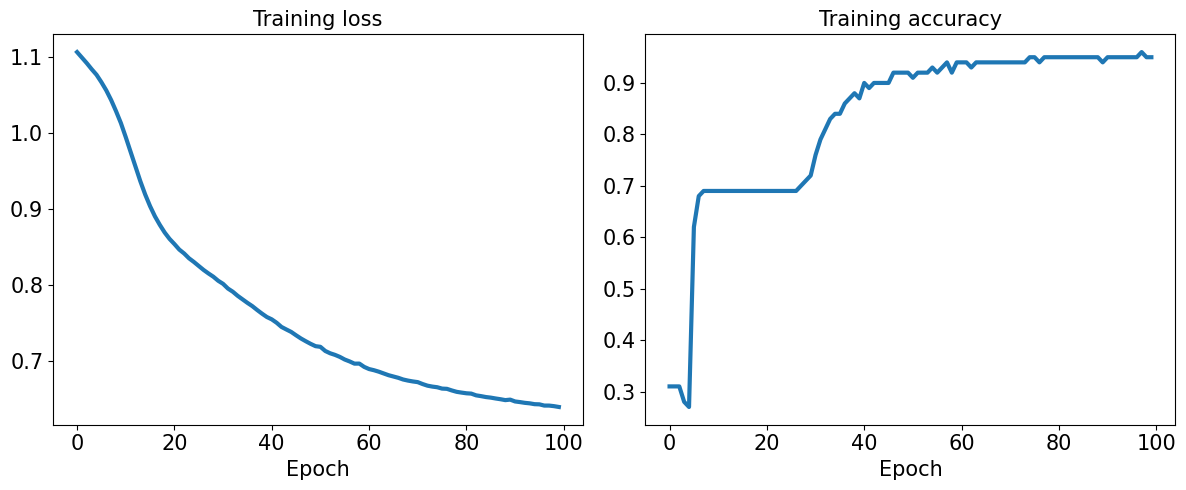

In [36]:
fig = plt.figure(figsize=(12, 5))
ax = fig.add_subplot(1, 2, 1)
ax.plot(loss_hist, lw=3)
ax.set_title('Training loss', size=15)
ax.set_xlabel('Epoch', size=15)
ax.tick_params(axis='both', which='major', labelsize=15)

ax = fig.add_subplot(1, 2, 2)
ax.plot(accuracy_hist, lw=3)
ax.set_title('Training accuracy', size=15)
ax.set_xlabel('Epoch', size=15)
ax.tick_params(axis='both', which='major', labelsize=15)
plt.tight_layout()



plt.show()

In [37]:
X_test_norm = (X_test - np.mean(X_train)) / np.std(X_train)
X_test_norm = torch.from_numpy(X_test_norm).float()
y_test = torch.from_numpy(y_test)
pred_test = model(X_test_norm)

correct = (torch.argmax(pred_test, dim=1) == y_test).float()
accuracy = correct.mean()

print(f'Test Acc.: {accuracy:.4f}')

Test Acc.: 0.9800
